# CA with plotnine

In [1]:
import pandas as pd
url = "http://factominer.free.fr/factomethods/datasets/women_work.txt"
women_work = pd.read_table(url,header=0)

In [2]:
women_work

,stay.at.home,part-time.work,full-time.work,housewives.cut.from.world.totally.agree,housewives.cut.from.world.quite.agree,housewives.cut.from.world.quite.disagree,housewives.cut.from.world.totally.disagree
both.man.and.woman.work,13,142,106,107,75,40,39
man.morks.more,30,408,117,192,175,100,88
only.man.works,241,573,94,140,215,254,299


In [3]:
# Modèle avec colonnes supplémentaires
from scientisttools.decomposition import CA
my_ca = CA(n_components=None,col_sup=[3,4,5,6]).fit(women_work)

## Row points - CA

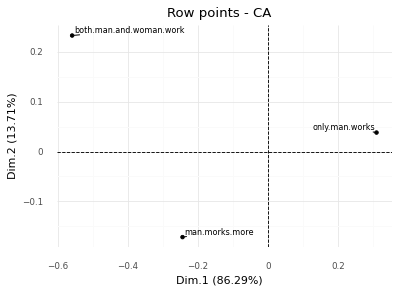

In [4]:
from scientisttools.ggplot import fviz_ca_row
p = fviz_ca_row(my_ca,repel=True)
print(p)

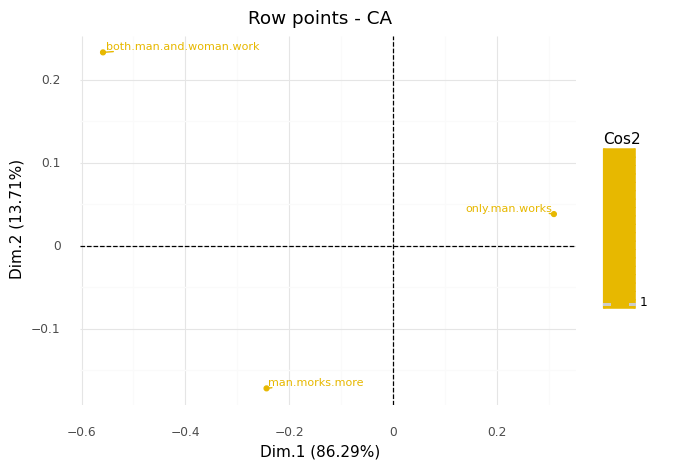

In [5]:
p = fviz_ca_row(my_ca,color="cos2",repel=True)
print(p)

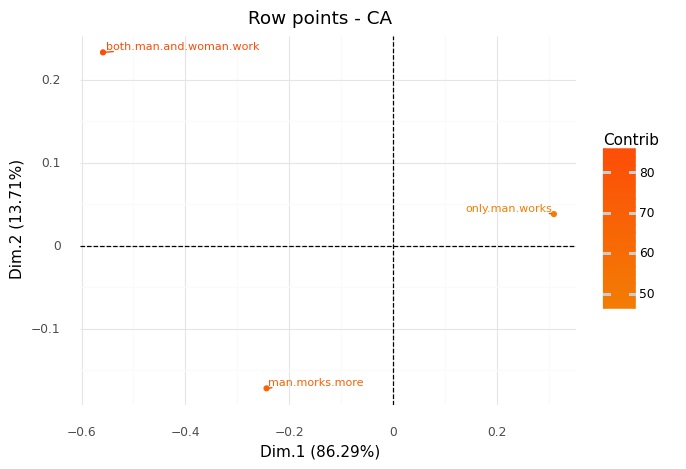

In [6]:
p = fviz_ca_row(my_ca,color="contrib",repel=True)
print(p)

In [7]:
# Using  numpy color
import numpy as np
np.random.seed(123)
color_numpy = np.random.normal(size=3)
color_numpy

array([-1.0856306 ,  0.99734545,  0.2829785 ])

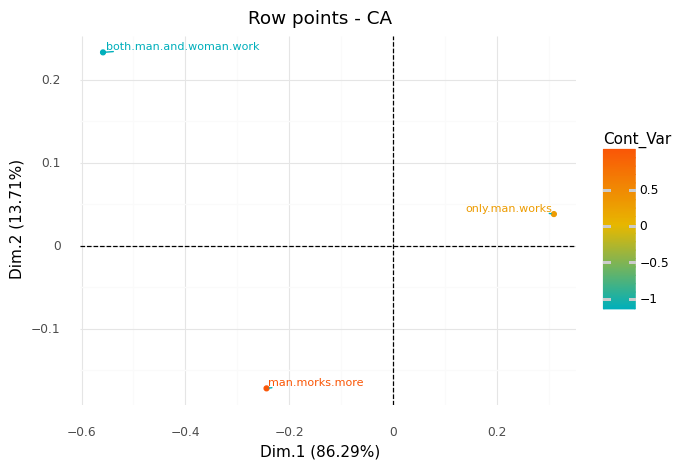

In [8]:
p = fviz_ca_row(my_ca,color=color_numpy,repel=True)
print(p)

In [9]:
# Using KMeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=np.random.seed(123), n_init="auto").fit(my_ca.row_["coord"])
kmeans.labels_

array([2, 1, 0])

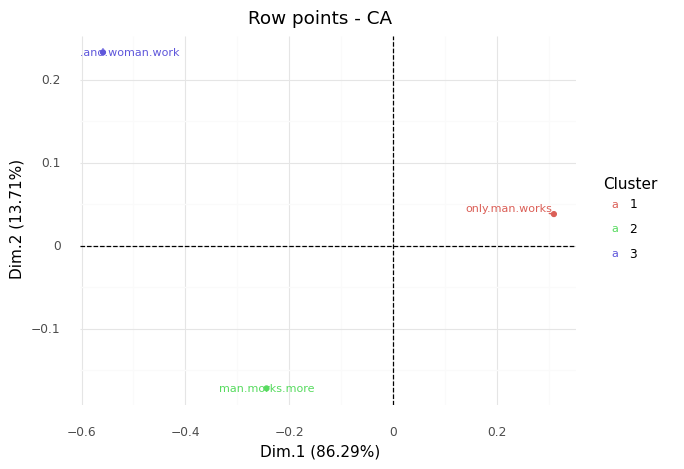

In [10]:
p = fviz_ca_row(my_ca,color=kmeans,repel=True)
print(p)

## Columns points - CA

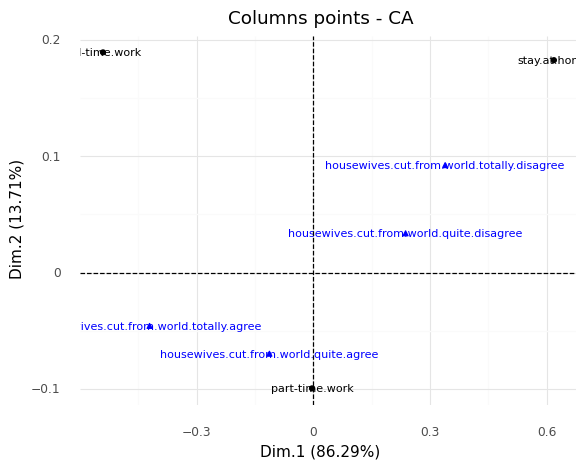

In [11]:
from scientisttools.ggplot import fviz_ca_col
p = fviz_ca_col(my_ca,repel=False)
print(p)

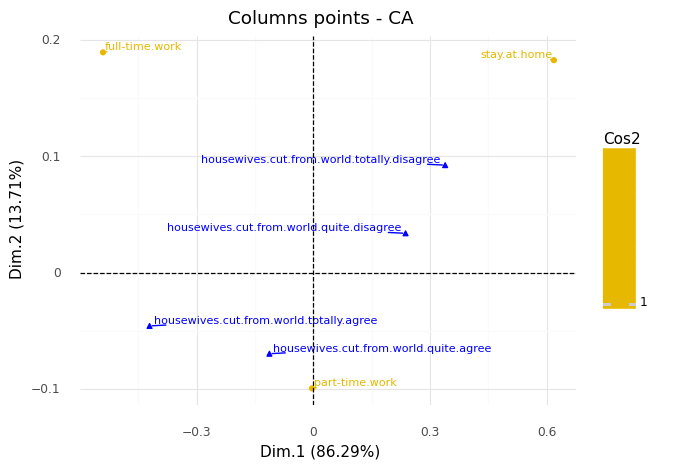

In [12]:
p = fviz_ca_col(my_ca,color="cos2",repel=True)
print(p)

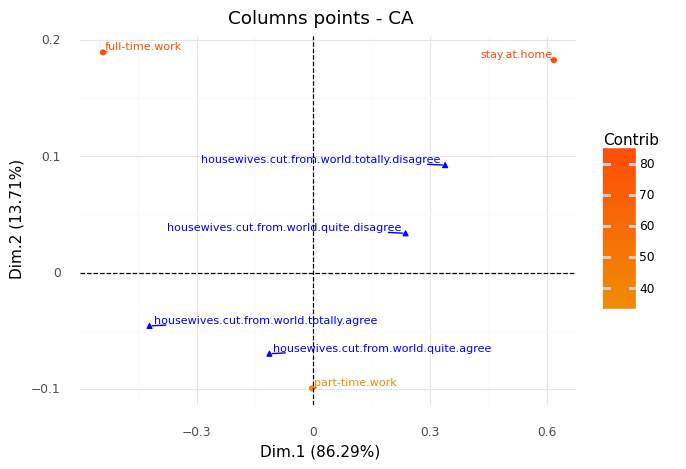

In [13]:
p = fviz_ca_col(my_ca,color="contrib",repel=True)
print(p)

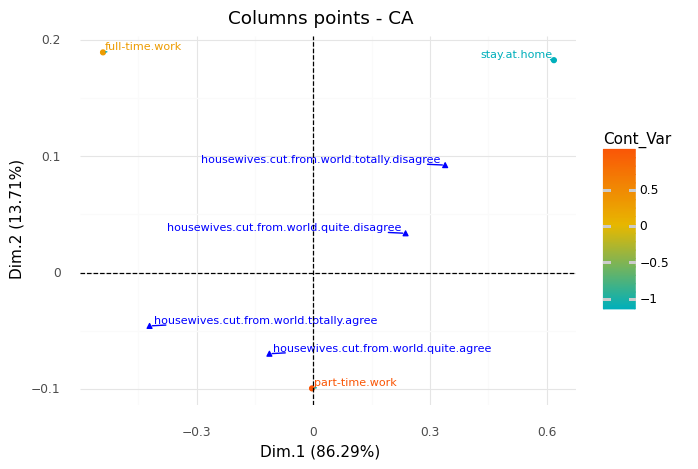

In [14]:
np.random.seed(123)
color_numpy = np.random.normal(size=3)
p = fviz_ca_col(my_ca,color=color_numpy,repel=True)
print(p)

In [15]:
# Using KMeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=np.random.seed(123), n_init="auto").fit(my_ca.col_["coord"])
kmeans.labels_

array([1, 2, 0])

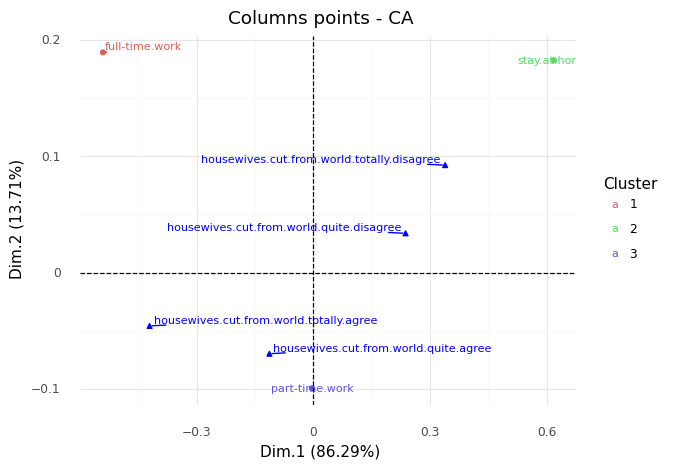

In [16]:
p = fviz_ca_col(my_ca,color=kmeans,repel=True)
print(p)

## Contributions

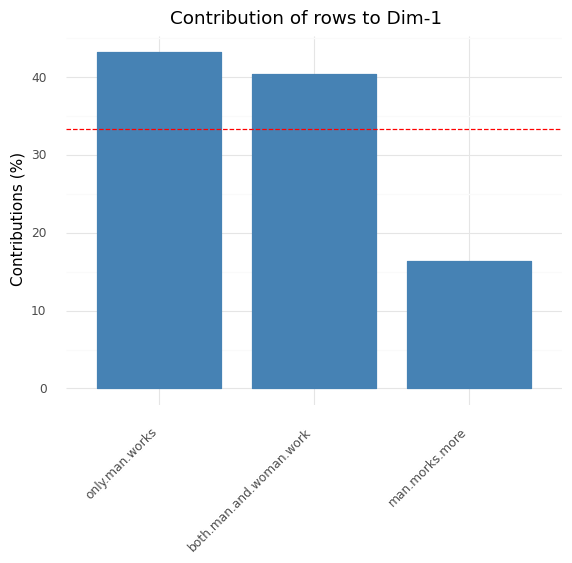

In [17]:
from scientisttools.ggplot import fviz_contrib
p = fviz_contrib(my_ca,choice="row",axis=0)
print(p)

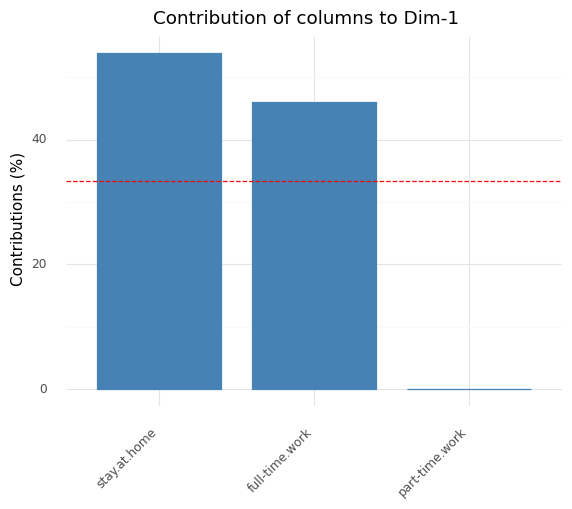

In [18]:
from scientisttools.ggplot import fviz_contrib
p = fviz_contrib(my_ca,choice="col",axis=0)
print(p)

## Cosinus

In [19]:
from scientisttools.ggplot import fviz_cosines
p = fviz_cosines(my_ca,choice="ind",axis=0)
print(p)

AttributeError: 'CA' object has no attribute 'n_components_'

In [ ]:
from scientisttools.ggplot import fviz_cosines
p = fviz_cosines(my_ca,choice="var",axis=0)
print(p)